<a href="https://colab.research.google.com/github/FarazAhmad2/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the dataset
filepath = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Bike Sharing Demand Prediction - Faraz Ahmad/SeoulBikeData.csv'
df = pd.read_csv(filepath, encoding='latin')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [7]:
# Checking for null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
# Checking for duplicate values
len(df[df.duplicated()])

0

# <b> Exploratory Data Analysis

In [9]:
df.rename(columns={'Rented Bike Count': 'rented_bike_count','Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility',
 'Dew point temperature(°C)': 'dew_point_temperature', 'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall',
 'Functioning Day':'functioning_day','Temperature(°C)':'temperature','Humidity(%)':'humidity'}, inplace=True)

In [10]:
df.head(1)

,Date,rented_bike_count,Hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
# Changing the format of date column from 'object' to 'date'
df['Date']=pd.to_datetime(df['Date'])

In [12]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

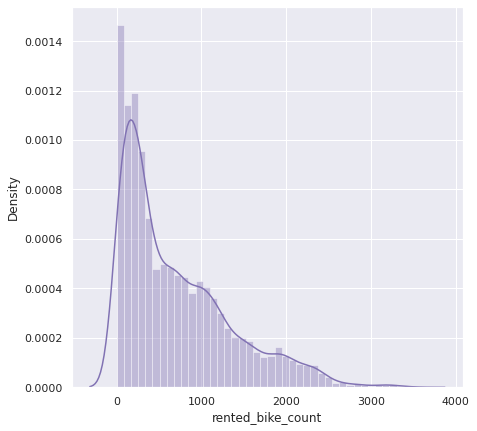

In [13]:
# Checking the distribution of dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'],color="m")

#### As we can see that the data is positively skewed. We have to use Square Root transformation in order to remove the skewness.

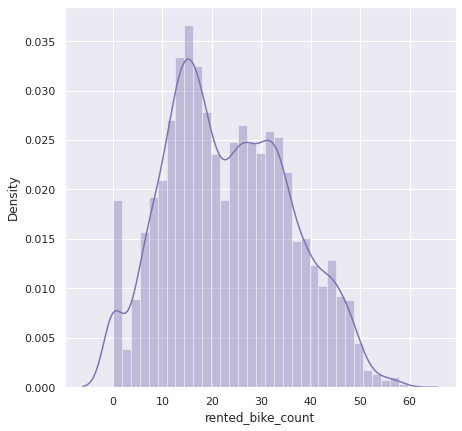

In [14]:
# Distribution of dependent variable 'Rented Bike Count' after Square Root transformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['rented_bike_count']),color="m")

In [15]:
numeric_features = df.describe().columns
numeric_features

Index(['rented_bike_count', 'Hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'month', 'weekdays_weekend'],
      dtype='object')

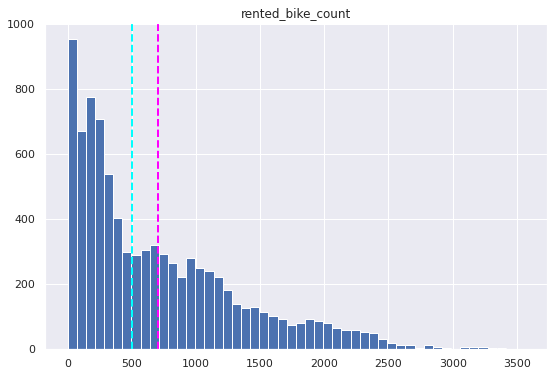

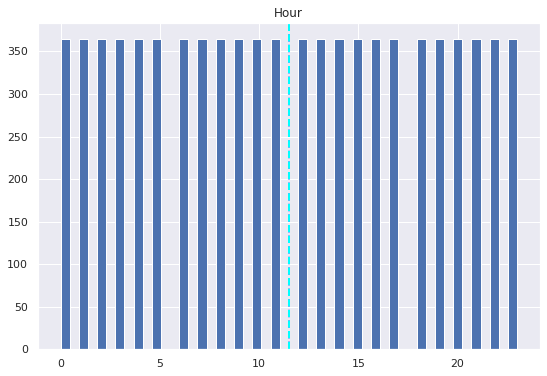

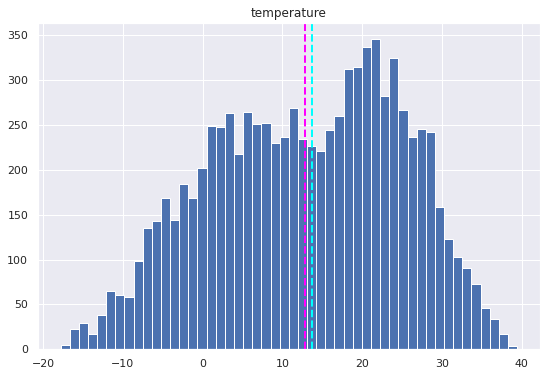

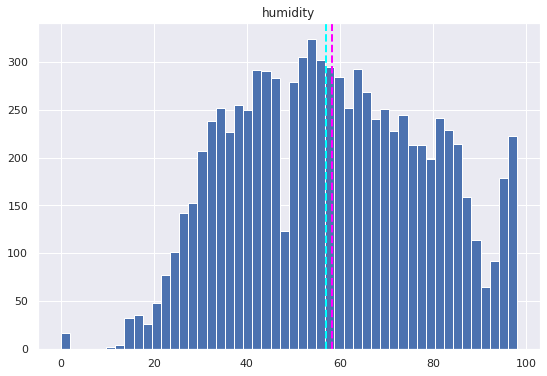

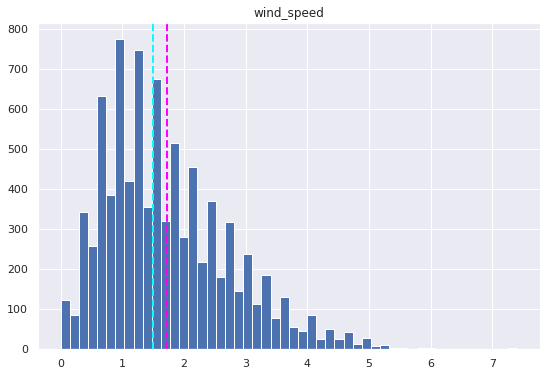

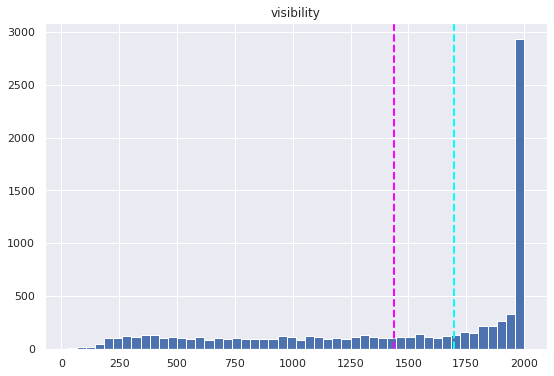

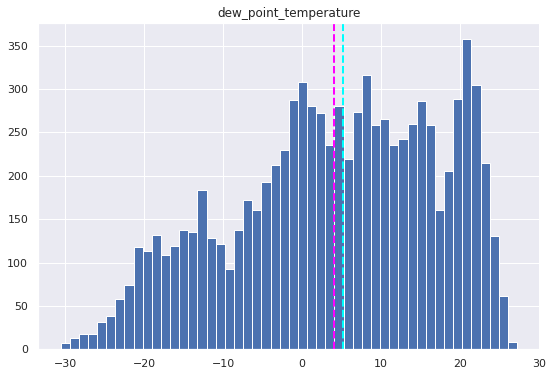

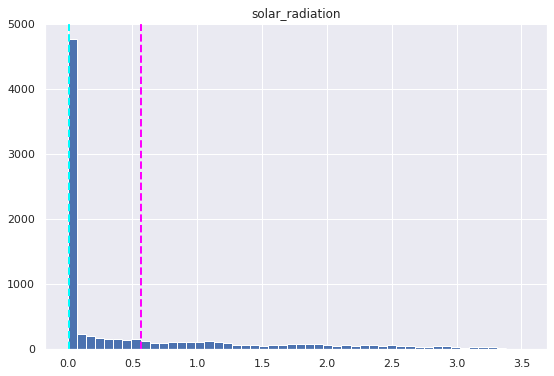

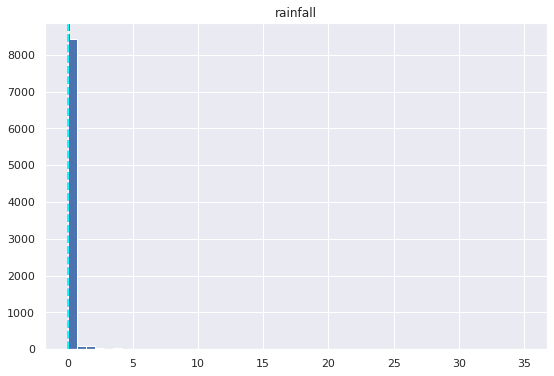

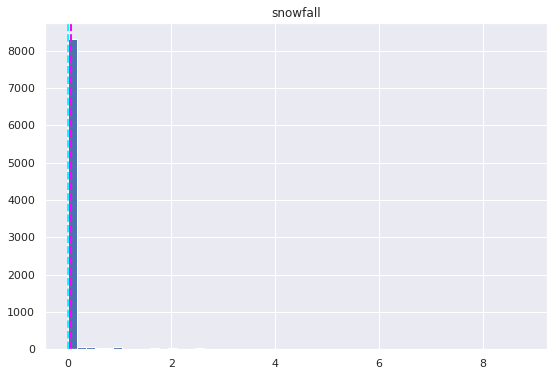

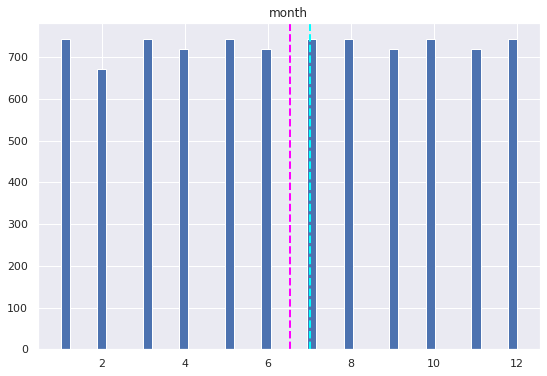

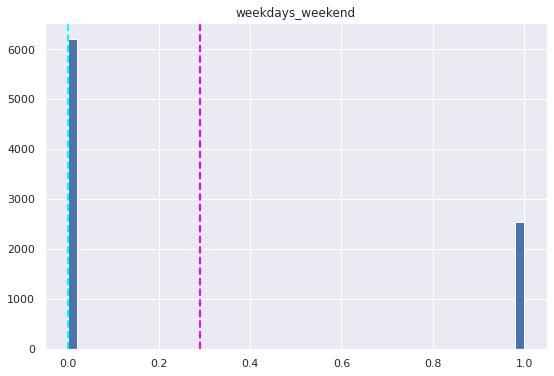

In [16]:
# plotting histogram for each numerical feature count 

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

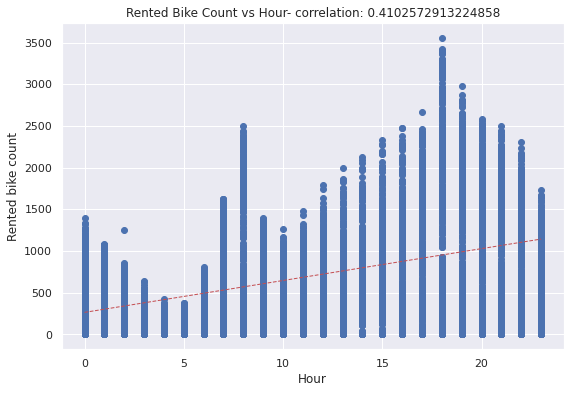

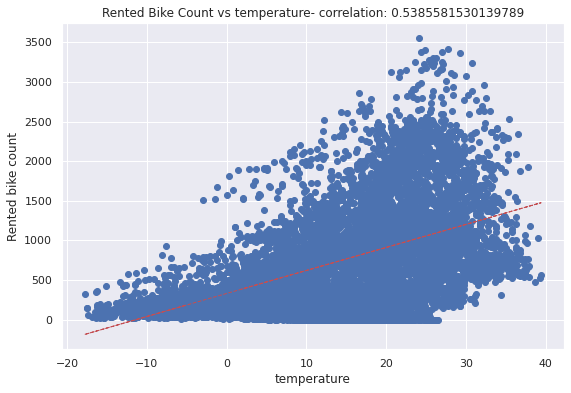

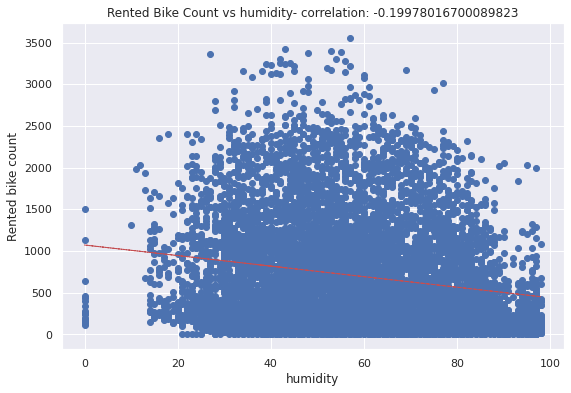

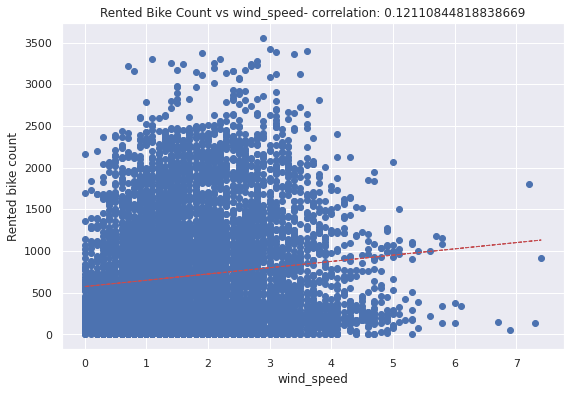

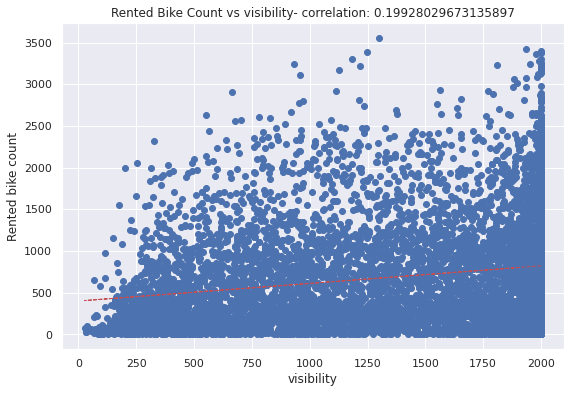

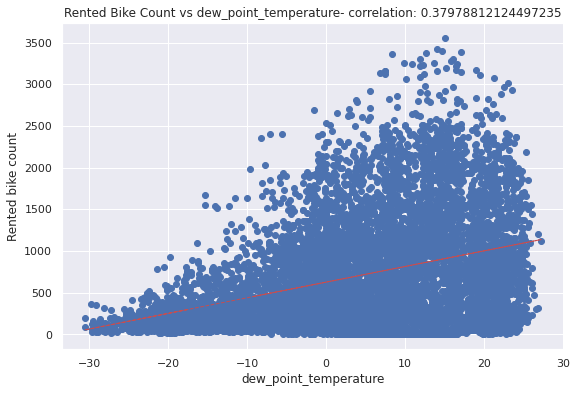

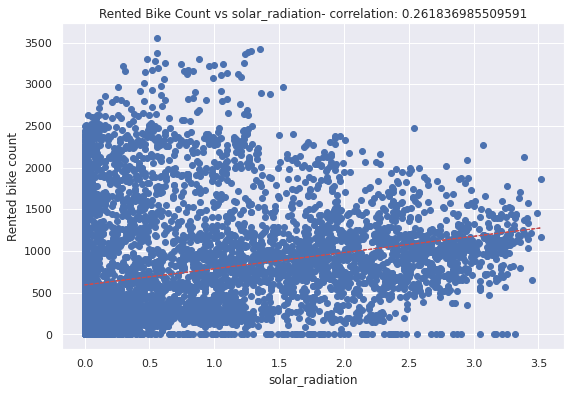

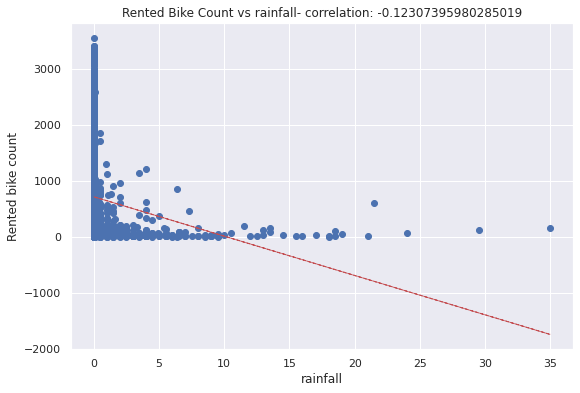

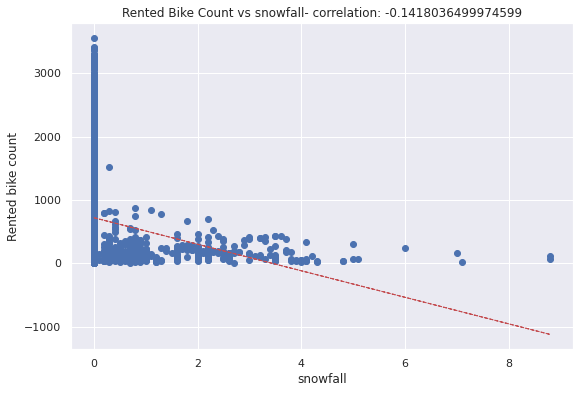

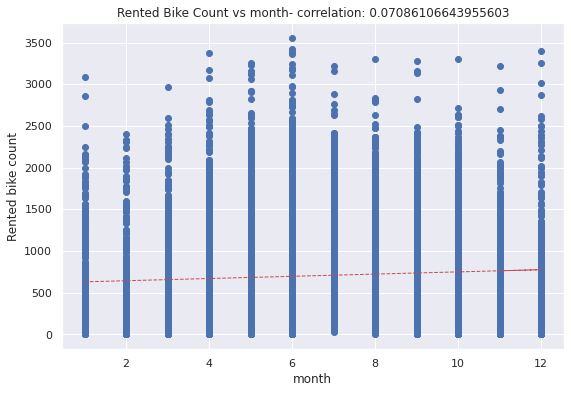

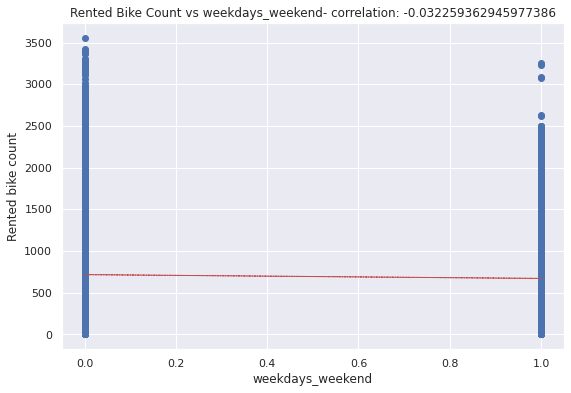

In [17]:
# ploting Regression plot for each column of dataset v/s rented bike count column
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented bike count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

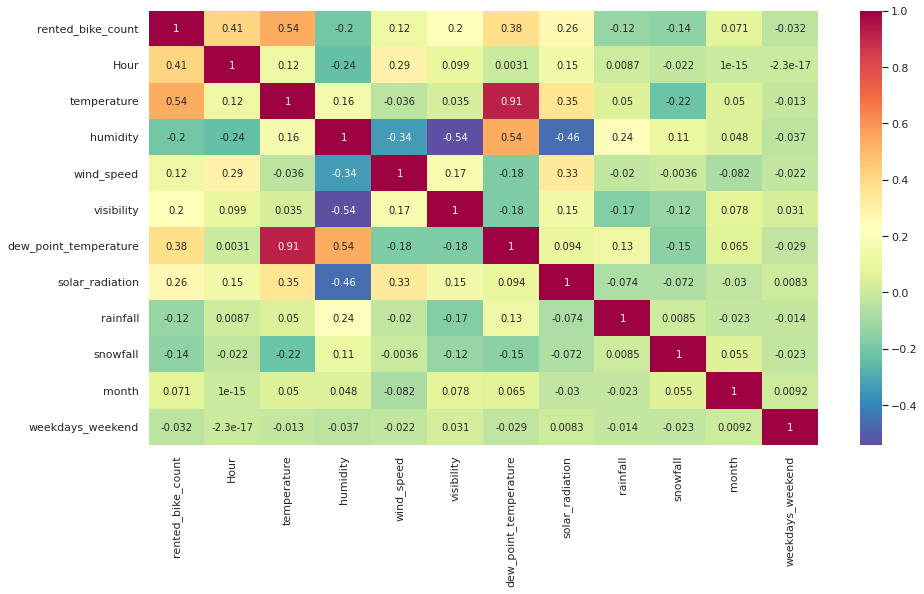

In [18]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='Spectral_r')

#### Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.

#### Temperature, Due point temperature and Humity are highly correlated to each other.

#### VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

#### or

#### VIF score of an independent variable represents how well the variable is explained by other independent variables.

# VIF = $\frac{1}{1-R^2}$

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bike_count','dew_point_temperature']]])

,variables,VIF
0,Hour,3.961874
1,temperature,3.236809
2,humidity,6.114153
3,wind_speed,4.616621
4,visibility,5.404128
5,solar_radiation,2.272068
6,rainfall,1.081252
7,snowfall,1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


In [21]:
numerical_features = ['Hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall',
       'snowfall', 'month', 'weekdays_weekend']

In [22]:
categorical_features = df.describe(include=['object','category']).columns

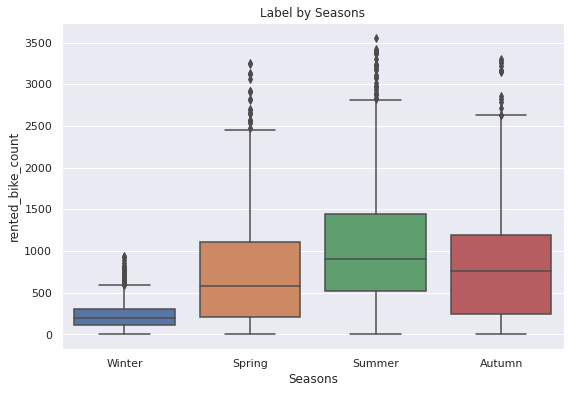

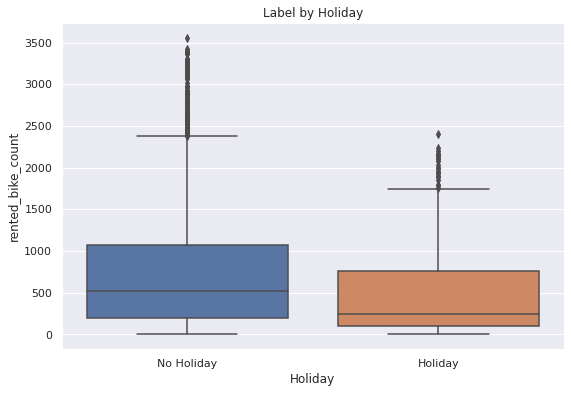

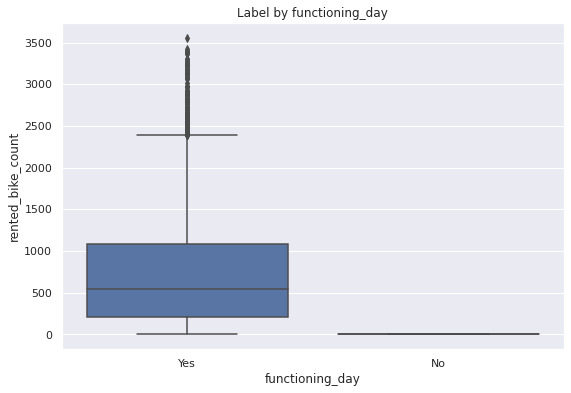

In [23]:
#plotting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  fig,ax = plt.subplots(figsize=(9,6))
  sns.boxplot(x=df[col],y=df["rented_bike_count"], ax=ax)
  ax.set_title('Label by ' + col)
  plt.show()




* ####  As we can see from the boxplot, the demand of bikes is lowest in winter while highest in summer.

* #### Slightly Higher demand during Non holidays as compared to Holidays

* ####  Almost no demnad on non functioning day





# <b> Average bikes rented per hour </b>

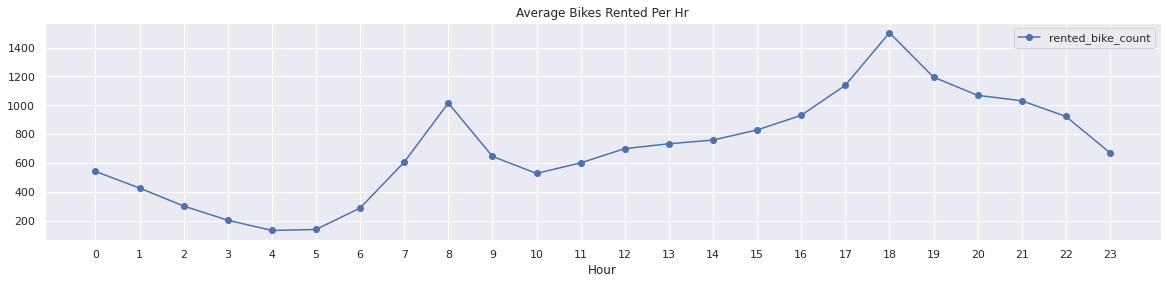

In [24]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['rented_bike_count'].mean()

# plot average bikes rented over time(hrs)
plt.figure(figsize=(20,4))
ax = avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
ax.set_xticks(range(len(avg_rent_hrs)))
ax.set_xticklabels(avg_rent_hrs.index.tolist())
plt.show()

* ####   During rush hour, rented bikes are in high demand from 8 a.m. to 9 p.m.
*  #### It is easy to see that demand is highest at 8 a.m. and 6 p.m., so we can say that during office opening and closing time, there is high demand of bikes.



# <b> Average bikes rented per month

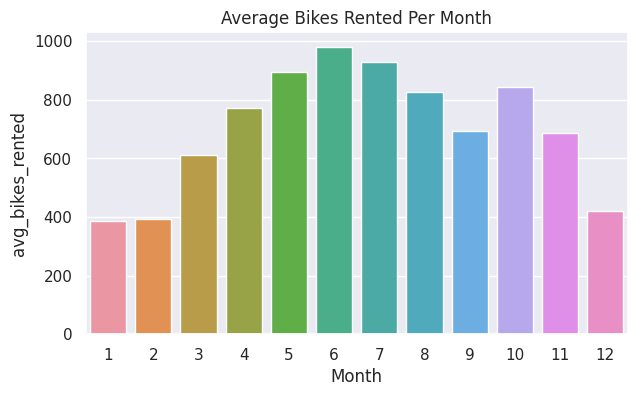

In [25]:
bikes_rented_monthly = pd.DataFrame(df.groupby('month')['rented_bike_count'].mean())
bikes_rented_monthly.columns = ['avg_bikes_rented']

# plotting
plt.figure(figsize=(7,4),dpi=100)
sns.barplot(x=bikes_rented_monthly.index.tolist(), y='avg_bikes_rented', data= bikes_rented_monthly).set(xlabel='Month',title='Average Bikes Rented Per Month')
plt.show()



*  #### Rented bikes are less in demand in December, January and February i.e. during the winter.
*  #### In addition, the demand for bikes is highest during the summer months of May, June and July.



#<b> Rented bikes count according to weekdays and weekends

<Figure size 700x400 with 0 Axes>

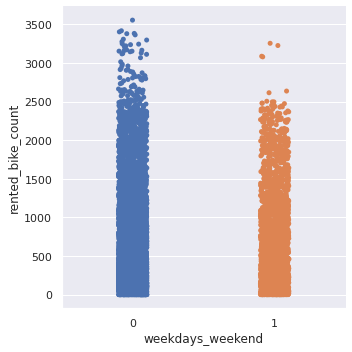

In [26]:
# plotting cat plot to check demand on weekdays vs weekends 

plt.figure(figsize=(7,4),dpi=100)
sns.catplot(x='weekdays_weekend',y='rented_bike_count',data=df)
plt.show()

#### Demand is higher during weekdays as compared to weekends.

# <b> Demands of bikes during Rainfall and Snowfall

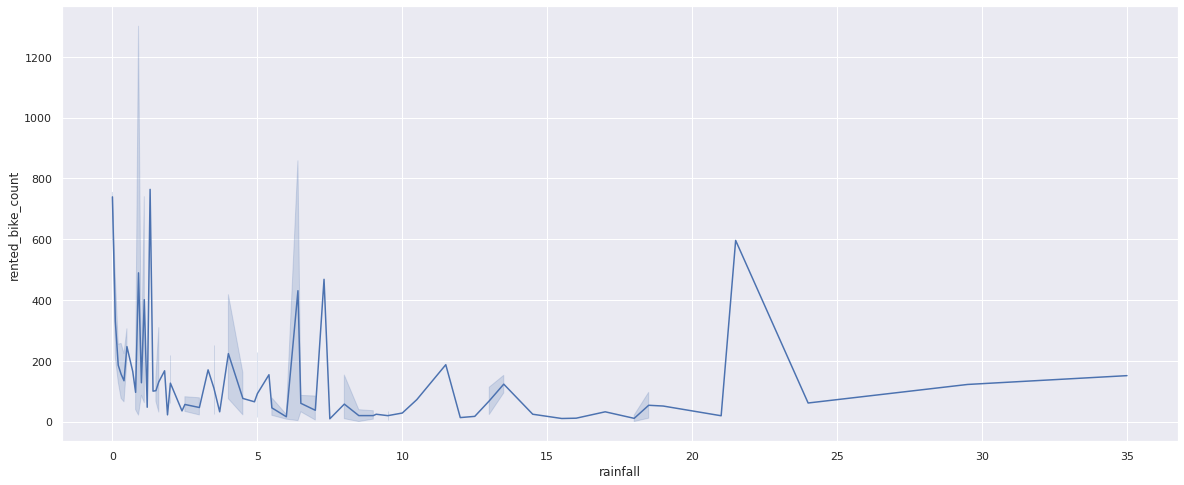

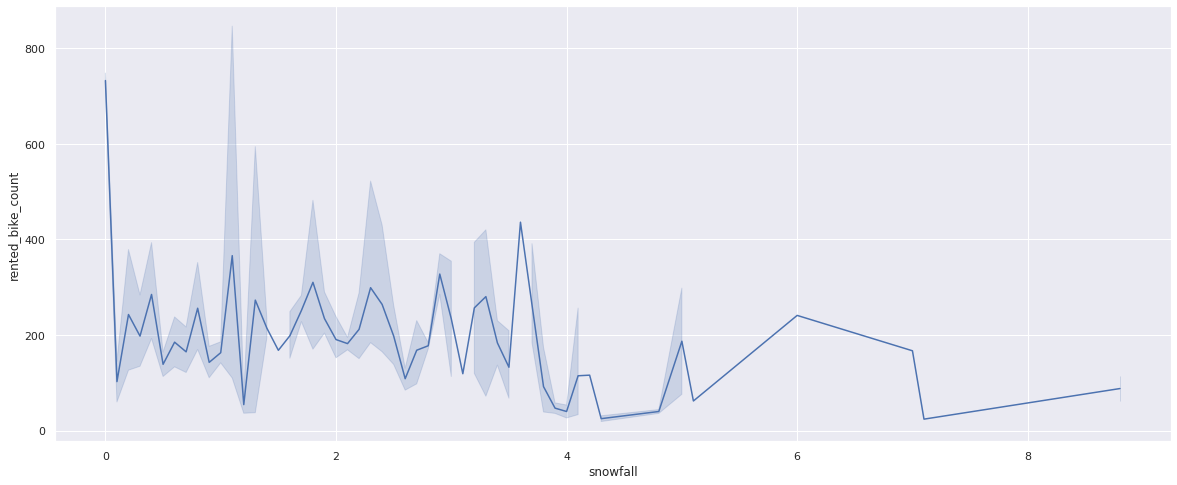

In [27]:
for col in ['rainfall', 'snowfall']:
  plt.subplots(figsize=(20,8))
  sns.lineplot(x=col, y='rented_bike_count', data=df)



*   #### The demand of bikes decreases with the increase in rainfall. 
*   #### Similarly, the demand of bikes also decreases with the increase in snowfall.


In [28]:
# One hot label encoding

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

df1 = df.copy()

df1['Holiday']= le.fit_transform(df1['Holiday']) 
df1['functioning_day']= le.fit_transform(df1['functioning_day'])
df1['Seasons']= le.fit_transform(df1['Seasons'])

In [29]:
df1.head()

,rented_bike_count,Hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,0


# <b> Training model with different types machine learning algorithms

In [30]:
# Making list of matrices to store the evaluation matrices of all models
mean_sqr_error=[]
root_mean_sqr_error=[]
r_sqr=[]
adj_r_sqr=[]
mean_abs_error = []

# Writing a function to train and evaluate linear models

In [31]:
def train_linear_model (model,X_train,y_train,X_test,y_test):

  #training the model
  model.fit(X_train,y_train)

  #predicting the values
  y_pred = model.predict(X_test)
  
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  # finding mean squared error
  MSE  = mean_squared_error(y_test**2, y_pred**2)
  print("Mean Squared Error :" , MSE)

  # finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error :" ,RMSE)

  # finding the r2 score
  r2 = r2_score(y_test**2, y_pred**2)
  print("R2 score :" ,r2)

  # finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 score : ",adj_r2)

  # finding mean absolute error
  MAE = mean_absolute_error(y_test**2,y_pred**2)
  print("Mean Absolute Error :" , MAE)

  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sqr_error.append(MSE)
  root_mean_sqr_error.append(RMSE)
  r_sqr.append(r2)
  adj_r_sqr.append(adj_r2)
  mean_abs_error.append(MAE)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

# Writing a function to train and evaluate tree, ensemble and other types of models

In [63]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("Mean Squared Error :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error :" ,RMSE)

    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    MAE = mean_absolute_error(y_test,preds)
    print("Mean Absolute Error :" , MAE)


    print('\n================Evalution Matrix=========================\n')

    mean_sqr_error.append(MSE)
    root_mean_sqr_error.append(RMSE)
    r_sqr.append(r2)
    adj_r_sqr.append(adj_r2)
    mean_abs_error.append(MAE)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

# Function to get feature importance

In [33]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

# Train-test split

In [34]:
X = df1.drop(['rented_bike_count'], axis=1)
y = np.sqrt(df1['rented_bike_count'])

In [35]:
X.shape

(8760, 14)

In [36]:
#  train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [37]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression()


================Evalution Matrix=========================

Mean Squared Error : 171498.52613815854
Root Mean Squared Error : 414.12380532656965
R2 score : 0.5876114648450723
Adjusted R2 score :  0.5842876654828565
Mean Absolute Error : 277.02381483642125

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



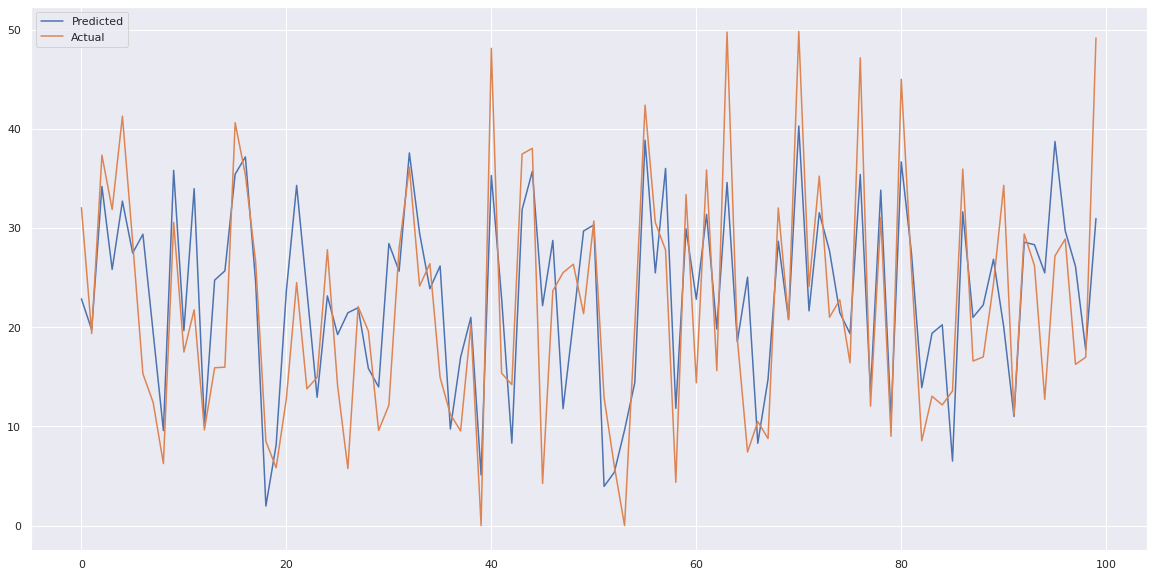

In [39]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Regularization
## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

Mean Squared Error : 171385.56450918535
Root Mean Squared Error : 413.98739655837994
R2 score : 0.58788309447216
Adjusted R2 score :  0.5845614844103353
Mean Absolute Error : 277.01779456132664

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



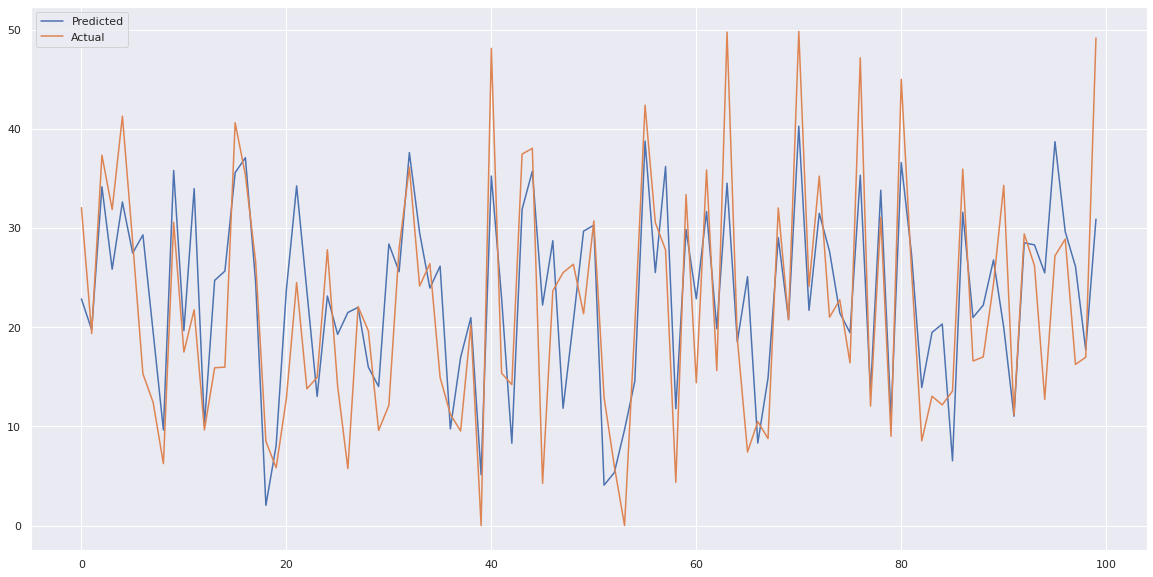

In [41]:
# calling train_linear_model function to train,fit and evaluate the lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

## Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

Mean Squared Error : 171129.3084672732
Root Mean Squared Error : 413.67778338614363
R2 score : 0.5884992925009618
Adjusted R2 score :  0.5851826489172045
Mean Absolute Error : 276.8716150549978

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



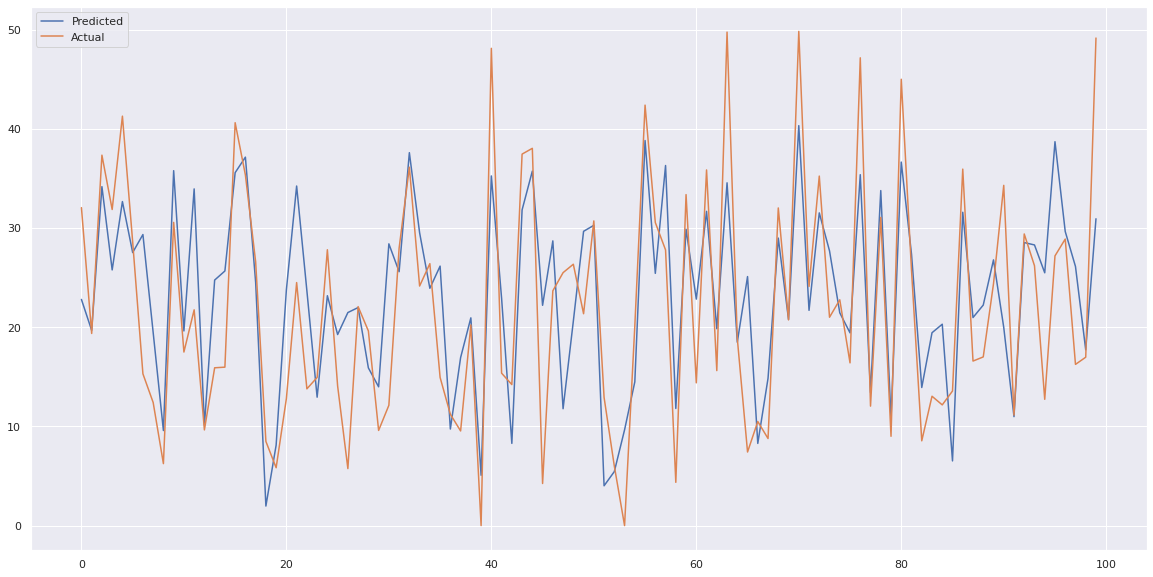

In [43]:
# calling train_linear_model function to train,fit and evaluate the ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

## ElasticNet Regression

In [44]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ElasticNet model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

Mean Squared Error : 171133.44550556893
Root Mean Squared Error : 413.68278367073594
R2 score : 0.5884893445019843
Adjusted R2 score :  0.5851726207386152
Mean Absolute Error : 276.8742895932091

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



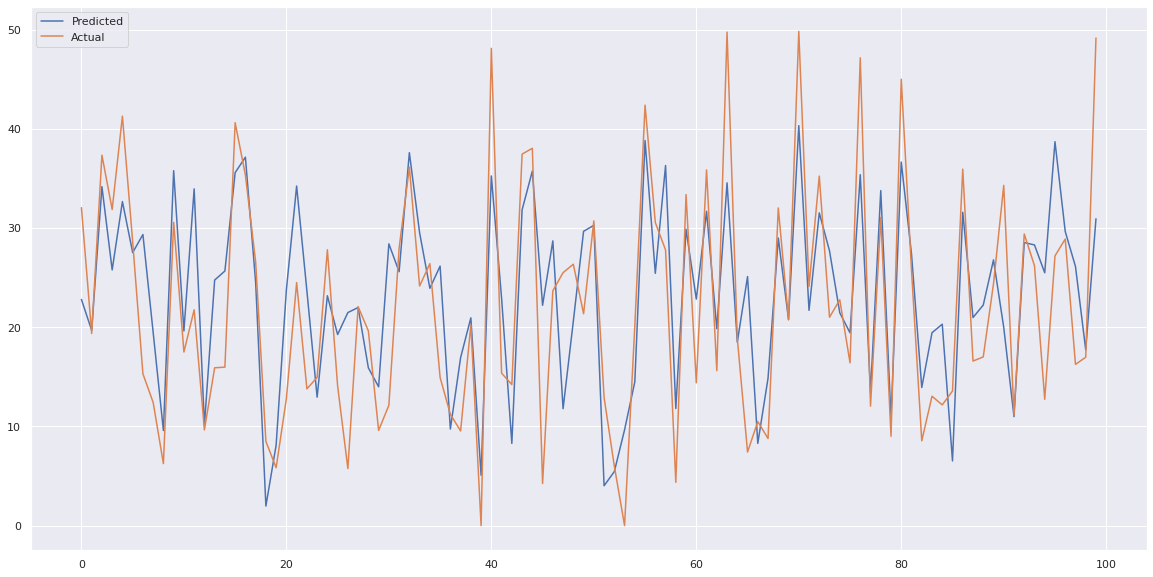

In [45]:
# calling train_linear_model function to train,fit and evaluate the ElasticNet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [46]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

Mean Squared Error : 123961.74261023756
Root Mean Squared Error : 352.0820111994328
R2 score : 0.7019192957430687
Adjusted R2 score :  0.6995168030202149
Mean Absolute Error : 234.93883166836247

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



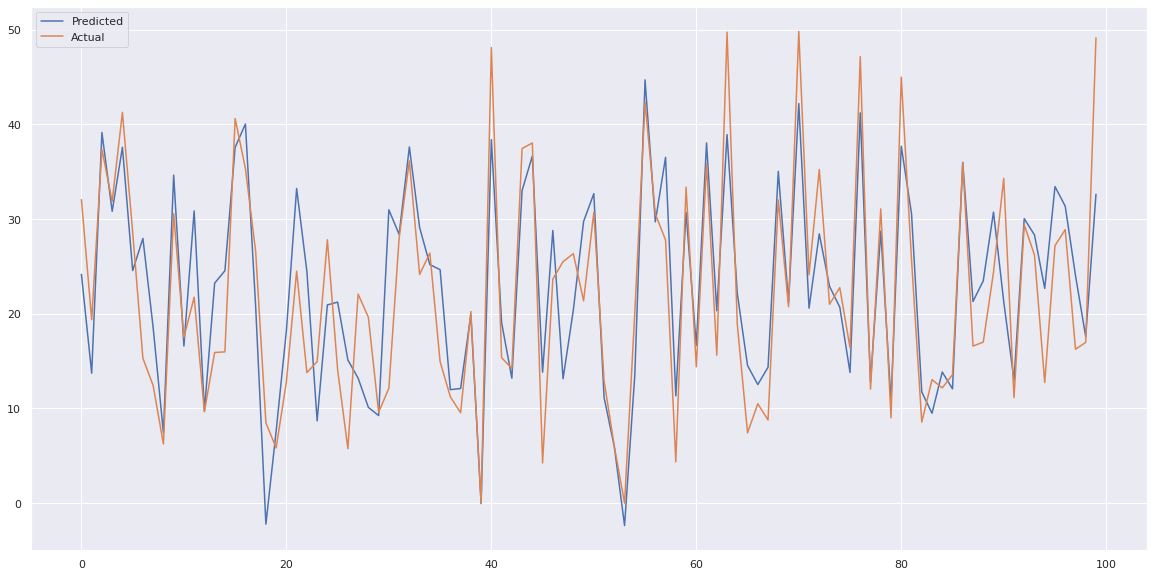

In [47]:
# calling train_linear_model function to train,fit and evaluate the polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# Train-Test split for tree, ensemble and other different models

In [57]:
X = df1.drop(['rented_bike_count'], axis=1)
y = df1['rented_bike_count']

#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Decision Tree Regression



================Evalution Matrix=========================

Mean Squared Error : 80794.61301369863
Root Mean Squared Error : 284.2439322372575
R2 : 0.8017335292169137
Adjusted R2 :  0.8001355265738721
Mean Absolute Error : 163.71803652968038

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



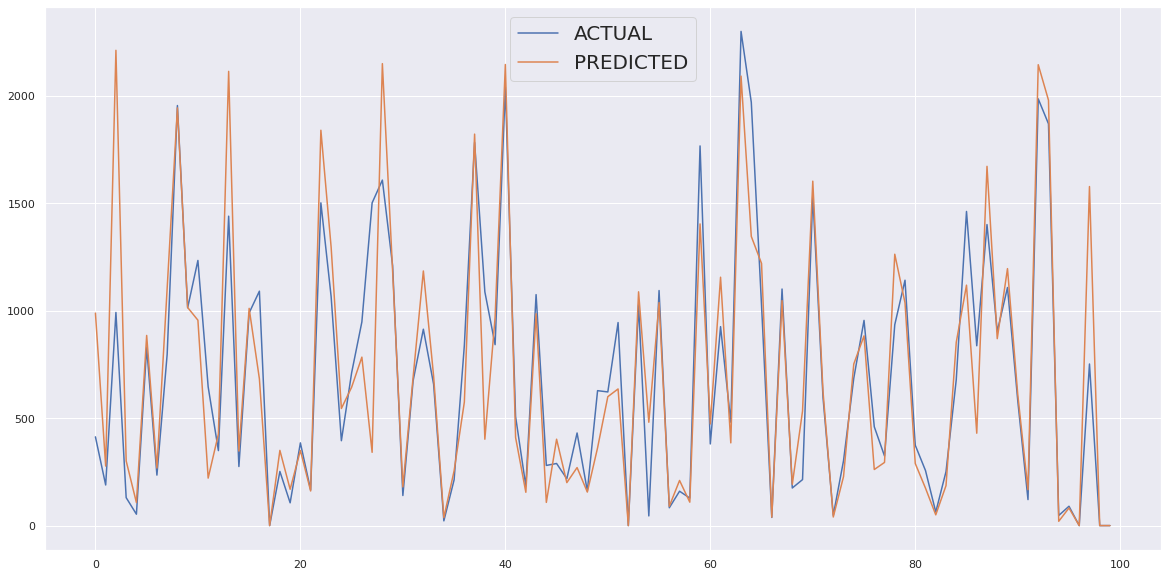

In [58]:
from sklearn.tree import DecisionTreeRegressor

#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

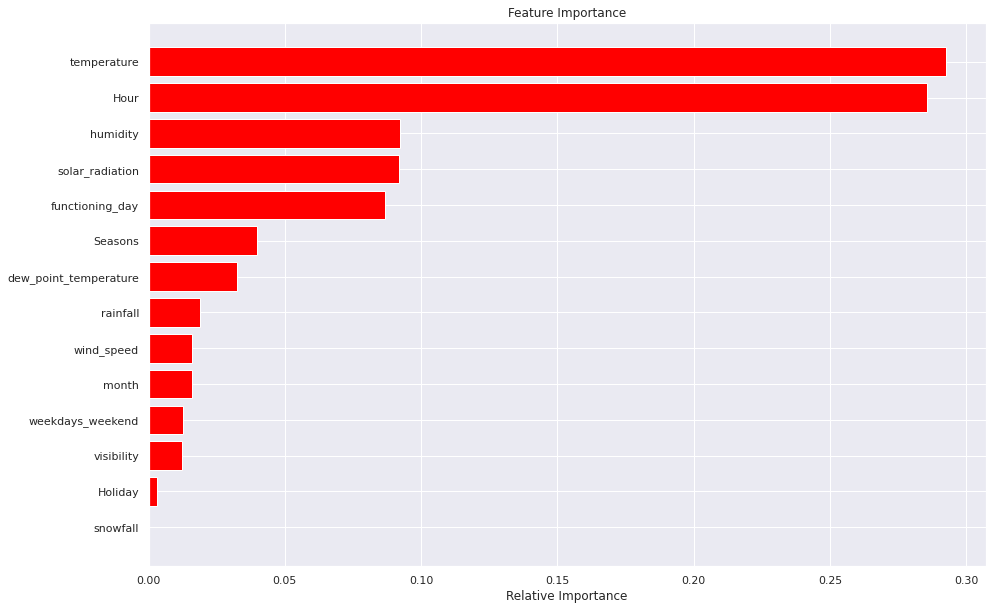

In [59]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor

#creating model of random forest
rf_model = RandomForestRegressor()

In [61]:
# Hyperparameter tuning
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

Mean Squared Error : 54306.16033136256
Root Mean Squared Error : 233.03682183586903
R2 : 0.8667350414952275
Adjusted R2 :  0.8656609428083727
Mean Absolute Error : 161.95664675983286

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



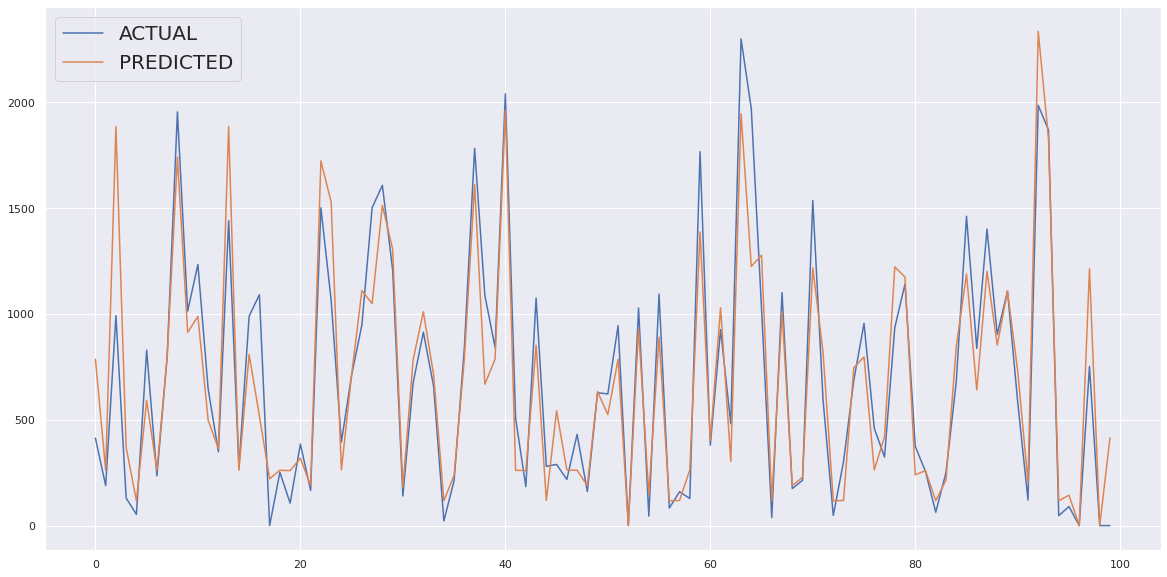

In [62]:
# calling run_model function to train,fit and evaluate the Random Forest model
run_model(rf_grid,X_train,y_train,X_test,y_test)

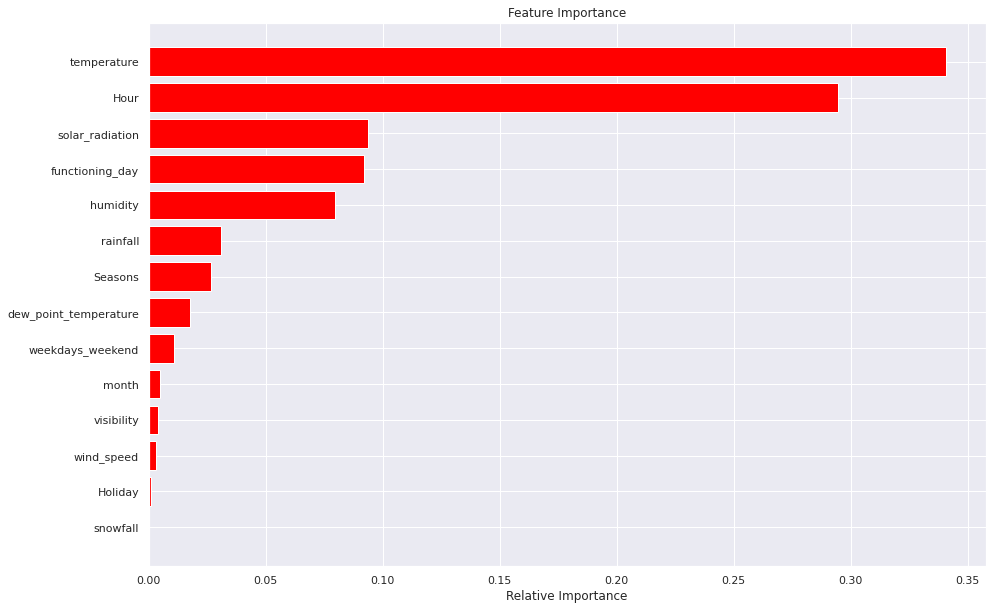

In [65]:
#optimal rf model
optimal_rf_model = rf_grid.best_estimator_

#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)